# Model Fitting Intro

In [1]:
#the usual import statements
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's start with simple linear fitting. To simulate some "real" data, we'll draw our numbers from a model like y=mx+b, but then add some random noise to them. Luckily, numpy has lots of great random number generation functions that we'll use extensively later in the class. 

In [2]:
#generate 21 random numbers from a flat distribution (all values equally probable) with values between 0 and 1. 
#subtract 0.5 so that the numbers now range from -0.5 and 0.5, which we'll call "noise"
noise = (np.random.rand(21)-0.5)
#eventually we'll add this to our model to synthesize data, but for now let's just print it so we can verify
noise

array([ 0.24042134,  0.19300481, -0.39078925, -0.09791296,  0.2168627 ,
       -0.02186105, -0.01919319,  0.06309706,  0.16110117,  0.4049529 ,
       -0.1753539 ,  0.02187501, -0.23777956, -0.40743   , -0.23161428,
        0.0560552 , -0.30639721, -0.47991203,  0.00858819, -0.10206471,
        0.21575659])

In [15]:
# create simple model y = 2x
x = np.arange(21)
model=2*x

In [16]:
#now add our noise to this model to synthesize data
data=model+noise

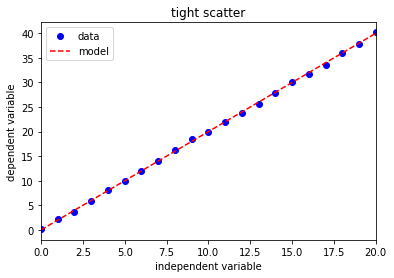

In [20]:
#plot synthetic data with points and model with dashed red line
plt.plot(x,data, 'bo', label='data')
plt.plot(x,model,'r--', label='model')
plt.xlim(0,20)
plt.xlabel("independent variable")
plt.ylabel("dependent variable")
plt.title("tight scatter")
plt.legend()

OK so that's a bit ridiculous. If you squint you can see that the values don't fall perfectly on the line, but clearly they're not very far off either. Let's make our "noise" more dramatic. 

In [18]:
#make noisier noise (between -5 and 5)
noise2 = (np.random.rand(21)-0.5)*10
noise2

array([ 1.92095266,  4.54361231, -0.78553904,  2.64652621,  2.77564704,
        0.04358556, -1.7083711 ,  4.14343187, -0.61724289, -1.90900009,
       -2.75827952, -2.41834676,  2.86055307,  2.02430359, -3.28388189,
        0.74568896,  2.14888976, -2.21093081,  3.53717554,  3.71311179,
       -4.33095422])

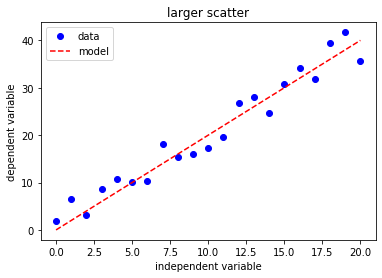

In [21]:
#make and plot this new set of data
data2 = model+noise2
plt.plot(x,data2, 'bo', label='data')
plt.plot(x,model, 'r--', label='model')
plt.xlabel("independent variable")
plt.ylabel("dependent variable")
plt.title("larger scatter")
plt.legend()

# Use Residuals as metric for quality of fit

As discussed in the readings, when we have data and a model fit, one way to assess the quality of the fit is to look at the residuals, so let's do that. If your model is defined at all the same points as your data as here, this is simple. To make residuals, all you have to do is subract your model from your data. 

Note that in many cases this may not be the case, and you might have to "interpolate" your model to predict the value it would have at all the same x locations as your data points. We won't do this right now, but keep it in mind for the future.

Text(0.5, 0, 'independent variable')

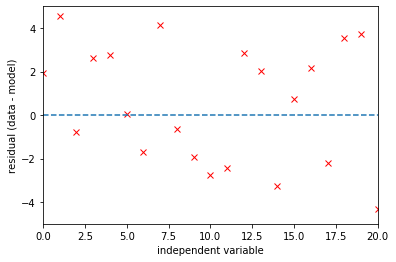

In [23]:
#define and plot residuals
residuals = data2-model
plt.plot(x, residuals, 'rx')
#plot a "perfect fit" line at residual value = 0
plt.plot([0,20],[0,0],'--')
plt.ylim(-5,5)
plt.xlim(0,20)
plt.ylabel('residual (data - model)')
plt.xlabel('independent variable')

# Summing Residuals

OK so now let's find out how to estimate the quality of fit in python, starting by simply taking the sum of the residual magnitudes.

In [26]:
#squaring and square rooting gives us only positive distances 
residuals_mag = np.sqrt((residuals)**2)
residuals_mag

array([1.92095266, 4.54361231, 0.78553904, 2.64652621, 2.77564704,
       0.04358556, 1.7083711 , 4.14343187, 0.61724289, 1.90900009,
       2.75827952, 2.41834676, 2.86055307, 2.02430359, 3.28388189,
       0.74568896, 2.14888976, 2.21093081, 3.53717554, 3.71311179,
       4.33095422])

In [27]:
#then add them all up to get a total measure of the magnitudes
total_error_mag = sum(residuals_mag)
total_error_mag

51.1260246799388

In [28]:
#or we can take the squares, as is more commonly done
residuals_sq = residuals**2
residuals_sq

array([3.69005913e+00, 2.06444128e+01, 6.17071585e-01, 7.00410096e+00,
       7.70421649e+00, 1.89970103e-03, 2.91853180e+00, 1.71680277e+01,
       3.80988788e-01, 3.64428132e+00, 7.60810591e+00, 5.84840105e+00,
       8.18276385e+00, 4.09780502e+00, 1.07838803e+01, 5.56052020e-01,
       4.61772721e+00, 4.88821503e+00, 1.25116108e+01, 1.37871992e+01,
       1.87571645e+01])

In [29]:
#then add them all up to get a total measure of the magnitudes
total_error_sq = sum(residuals_sq)
total_error_sq

155.41251517532916

These sums are the numbers that you're trying to minimize when doing "least-squares" fitting. You'll note though that these numbers themselves don't mean much in and of themselves, or relative to one another here since the methods (magnitudes vs. squares) are different. Indeed, the trick with model fitting metrics is often the context. The number only means something relative to another fit of the same type applied to the same data. 

# Model Fitting

Now, let's assume that I have only the data and no knowledge of the underlying model relationship

Text(0.5, 1.0, 'no fit')

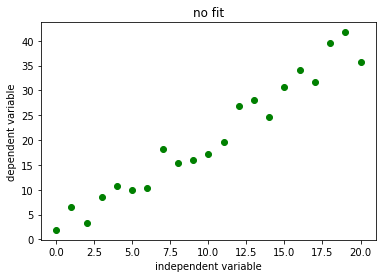

In [30]:
#some data I collected
plt.plot(x,data2, 'go')
plt.xlabel("independent variable")
plt.ylabel("dependent variable")
plt.title("no fit")

In exploring the data and developing a model, I might first want to know something about the value of the correlation coefficient R for these two variables

In [31]:
#there are lots of ways to do this in python. here's one
from scipy.stats.stats import pearsonr
#the output is the correlation coefficient R and the "p value", a measure of significance that we'll talk about later
pearsonr(x,data2)

(0.9754180131349011, 6.112696399389065e-14)

Text(0.5, 1.0, 'potential fits')

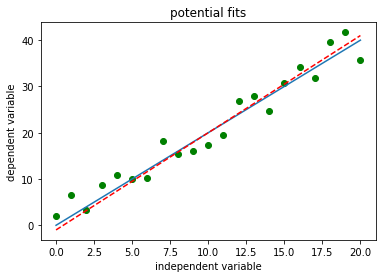

In [32]:
#this sum of squares metric might also allow me to judge the quality of one model relative to another. For example:
model2 = 2.1*x-1
plt.plot(x,data2, 'go')
plt.plot(x,model)
plt.plot(x,model2,'r--')
plt.xlabel("independent variable")
plt.ylabel("dependent variable")
plt.title("potential fits")

In [34]:
#they both look like reasonable matches to the data, so how do I know which one matches better?

error1 = sum((model-data2)**2)
error2 = sum((model2-data2)**2)
print("sum of squares for model 1 (true) is ", error1)
print("sum of squares for model 2 is ",error2)

sum of squares for model 1 (true) is  155.41251517532916
sum of squares for model 2 is  178.28796826408828


Note that if you execute all these cells multiple times, not infrequently the quality of fit metric for the alternate model will be better than the "true" model. The "truth" in the case of model fitting is elusive. We only know what the data tell us, and real data are never a perfect representation of truth. We can only do our best given the data we have and design other independent experiments to test our models. 

# Curve Fitting

Of course there are more sophisticated ways to choose a model besides simple trial and error. 

In [13]:
#python has lots of built-in functionalities for this kind of thing. let's look at a few
#to start, let's use scipy's stats module's linregress function to find a best linear fit
from scipy.stats import linregress

In [14]:
lin_model = linregress(x, data2)
print(lin_model)
print(type(lin_model))
lin_model[2]

LinregressResult(slope=1.9326426996466919, intercept=0.25635213322321704, rvalue=0.98396734277816056, pvalue=1.089742764360921e-15, stderr=0.080364472548628538)
<class 'scipy.stats._stats_mstats_common.LinregressResult'>


0.98396734277816056

In [15]:
#now let's try a more general model fitting function
import scipy.optimize as optimization

In [16]:
#to use it, you have to define a functional form for the fit line BUT NOT THE SPECIFIC VALUES

#for linear (straight line) fits this could take two forms

#line without an intercept (intercept zero)
def slopefunc(x,sl):
    return sl*x

#line with an intercept
def slopeintfunc(x,sl,incpt):
    return sl*x+incpt

#we could continue this to functions of arbitraty order
#for example, quadratic:

def quadfunc(x,a,b,c):
    return a+b*x+c*x*x

In [17]:
#then use curve_fit
fit = optimization.curve_fit(slopeintfunc,x,data2)

#the zeroth element then contains the optimal parameters for the functional parameters (in this case sl, incpt)
#the output of the function is a python data type called a tuple, which we'll learn about later
fit[0]

array([ 1.9326427 ,  0.25635213])

In [18]:
#and the next element contains what's called the covariance matrix, which can also be quite useful
fit[1]

array([[ 0.00645845, -0.06458453],
       [-0.06458453,  0.88265518]])

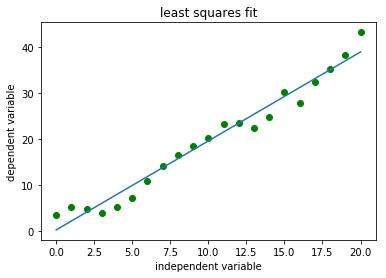

In [19]:
#let's plot it over the data now
plt.plot(x,data2, 'go')
plt.plot(x, slopeintfunc(x,fit[0][0],fit[0][1]))
plt.xlabel("independent variable")
plt.ylabel("dependent variable")
plt.title("least squares fit")

# Overfitting

since we can define functions to arbitrary dimensions, this can get a bit out of control

In [20]:
def tenparamfunc(x,a,b,c,d,e,f,g,h,i,j):
    return a+b*x+c*x**2+d*x**3+e*x**4+f*x**5+g*x**6+h*x**7+i*x**8+j*x**9

In [21]:
fit2 = optimization.curve_fit(tenparamfunc,x,data2)
fit2[0]

array([  3.39852696e+00,   4.81913842e+00,  -3.95229031e+00,
         1.19522518e+00,  -1.53171376e-01,   8.80049327e-03,
        -1.14512771e-04,  -1.07824174e-05,   4.93968873e-07,
        -6.26355592e-09])

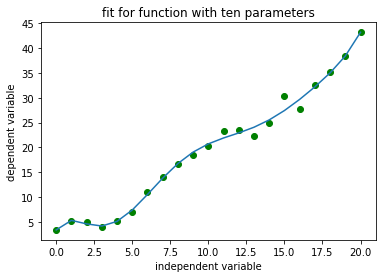

In [22]:
plt.plot(x,data2, 'go')
c = fit2[0]
plt.plot(x, tenparamfunc(x,c[0],c[1],c[2],c[3],c[4],c[5],c[6],c[7],c[8],c[9]))
plt.xlabel("independent variable")
plt.ylabel("dependent variable")
plt.title("fit for function with ten parameters")

### General rule of thumb

Number of parameters in your model should be <<< number of data points

# Fitting with error bars

Often we know enough about how our measurements are taken that we can assign "error bars" or "uncertainties" to our measurements

In [23]:
# equal errors (homoschedastic)
errors_uniform = np.ones(21)

#errors that vary (heteroschedastic)
errors_poisson = np.sqrt(data2)

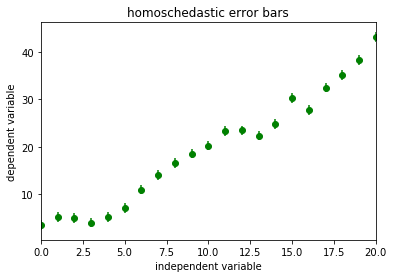

In [24]:
#visualize this
plt.errorbar(x,data2,yerr=errors_uniform, fmt='go')
plt.xlim(0,20)
plt.xlabel("independent variable")
plt.ylabel("dependent variable")
plt.title("homoschedastic error bars")

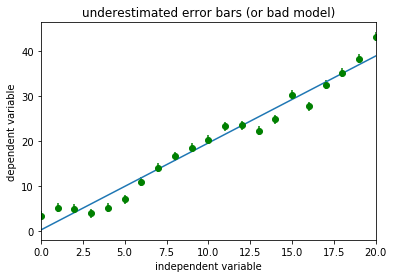

In [25]:
plt.errorbar(x,data2,yerr=errors_uniform, fmt='go')
plt.xlim(0,20)
plt.plot(x, slopeintfunc(x,fit[0][0],fit[0][1]))
plt.xlabel("independent variable")
plt.ylabel("dependent variable")
plt.title("underestimated error bars (or bad model)")

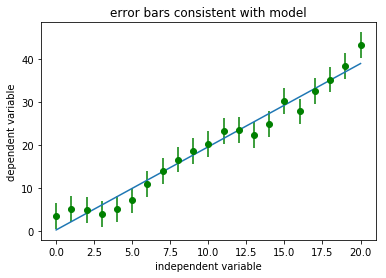

In [26]:
plt.errorbar(x,data2,yerr=errors_uniform*3, fmt='go')
plt.xlim(-1,21)
plt.plot(x, slopeintfunc(x,fit[0][0],fit[0][1]))
plt.xlabel("independent variable")
plt.ylabel("dependent variable")
plt.title("error bars consistent with model")

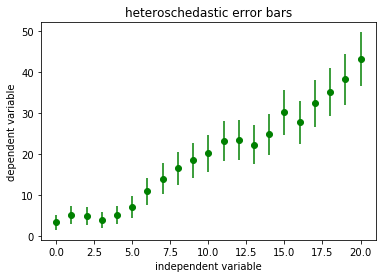

In [27]:
plt.errorbar(x,data2,yerr=errors_poisson, fmt='go')
plt.xlim(-1,21)
plt.xlabel("independent variable")
plt.ylabel("dependent variable")
plt.title("heteroschedastic error bars")

# Weighted Least Squares

If we want to take the uncertainty in each of our data points into consideration in calculating goodness of fit, we can extend this to assigning "weights" to each data point. 

Since larger error bars indicate greater uncertainty, these data points should be assigned less weight than other data points with smaller error bars. 

A weight is just like a coefficient in front of the (data-model)$^2$ calculation typical to least squares. More formally:

$$ Q = \sum_{i=1}^nw_i[y_i-f(x_i,\beta)]^2$$

Where $x_i$ is the independent variable, $y_i$ are the observed values, $f(x_i,\beta)$ is the model with some set of parameters $\beta$ and $w_i$ are the weights for each datapoint

A common weight is the reciprocal of the error value squared, or $\frac{1}{\sigma^2}$. Sigma here is the value of the error bar and is not to be confused with a standard deviation, though standard deviation values are often assigned as errors. 

Let's do this for our example of heteroschedastic error bars above

In [28]:
lsq_weighted=sum(1/errors_poisson**2*(data2-model)**2)
lsq_weighted

11.529078211658618

Oops what happened? Well, the model value at x=0 is 0 in this case, and the errors are too, so our 1/errors_poissson statement becomes problematic because we can't divide by zero. 

We can fix this by removing the datapoint from consideration (indeed it's rare that we measure something to be zero anyway, so it was a bit contrived to begin with). 

In [29]:
x3=np.arange(20)+1
model3=2*x3
noise3 = (np.random.rand(20)-0.5)*10
data3= 2*x3+noise3 
errors_poisson3 = np.sqrt(data3)

In [30]:
lsq_weighted=sum(1/errors_poisson3**2*(data3-model3)**2)
lsq_weighted

11.821074101524456

Similarly, we can build in the uncertainties/weights when we do the least squares fit to the data. As before, the function will minimize the least squares sum to find the best fit, but this time the version with the weights. 

In [31]:
fit_weighted = optimization.curve_fit(slopeintfunc,x3,data3, sigma=errors_poisson3)
fit_unweighted = optimization.curve_fit(slopeintfunc,x3,data3)

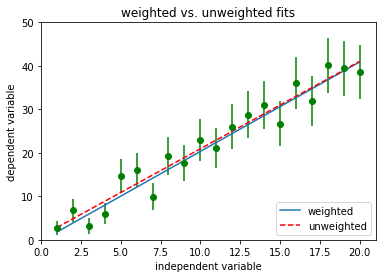

In [32]:
plt.errorbar(x3,data3,yerr=errors_poisson3, fmt='go')
plt.xlim(0,21)
plt.ylim(0,50)
plt.plot(x3, slopeintfunc(x3,fit_weighted[0][0],fit_weighted[0][1]), label='weighted')
plt.plot(x3, slopeintfunc(x3,fit_unweighted[0][0],fit_unweighted[0][1]), 'r--', label='unweighted')
plt.legend(loc='lower right',)
plt.xlabel("independent variable")
plt.ylabel("dependent variable")
plt.title("weighted vs. unweighted fits")

In [33]:
optimization.curve_fit?